## Diferencias Finitas

 Funciones no lineales
 
 Evaluación muy costosa

### Fuentes de error

Error de aproximación

$$\epsilon_{app} = \frac{h}{2} |f''(x)|$$

Error aritmético

$$\epsilon_{ro} = \frac{2|f(x)|\epsilon_m}{h}$$

Con $\epsilon_m$ como el error de máquina 

In [1]:
import numpy as np
import sympy as sy
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

In [60]:
def centro(x,h):
    f = np.exp(np.sin(2*x))
    f_3 = (np.exp(np.sin(2*(x+h/2))) - np.exp(np.sin(2*(x-h/2))))/h
    return f_3

In [61]:
x=0.5
h=0.1
d=centro(x,h)

In [62]:
display(d)

2.4932959255171205

In [63]:
x=sy.symbols('x')
f = sy.exp(sy.sin(2*x))
df = diff(f,x)
display(df)
ldf=sy.lambdify(x,df)
a = ldf(0.5)
print(a)

2*exp(sin(2*x))*cos(2*x)

2.506761534986894


In [75]:
h = np.array((1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2))
z = np.zeros(14)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
for i in range(14):
    x=0.5
    g = centro(x,h[i])
    z[i] = np.abs(a- g)

In [97]:
z

array([1.57773724e-01, 2.45469612e-02, 2.09839143e-03, 1.22054617e-04,
       1.11721462e-05, 2.15053005e-06, 6.99159992e-08, 1.89018428e-08,
       1.13827436e-09, 2.50095944e-10, 1.49584345e-10, 1.35077878e-08,
       1.35051207e-06, 1.35047249e-04])

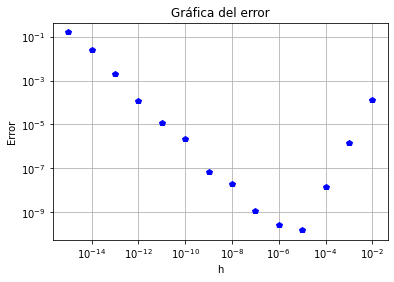

In [98]:
plt.loglog(h,z, 'bp')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Gráfica del error")
plt.grid(True)